## Loan Application Status Prediction

### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data set
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Attribute Information

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

### To predict:
Whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

### EDA 

In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#Checking for data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The data set contains 8 object values, 1 int and 4 float values.

In [6]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


It gives the information about the columns, rows, column names, non-null values, data types, memory usage.

In [7]:
#Checking for categorical columns
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical columns:", cat_col)
print("\n")


#Checking for numerical columns
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical columns:", num_col)
print("\n")

Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




In [8]:
#Checking no. of unique vales in each values
df.nunique().to_frame("No. of unique values")

,No. of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


This shows the unique values in each column. Loan_ID has the highest no. of unique values. So let's drop it.

In [9]:
#Dropping Loan_ID column
df.drop('Loan_ID', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We have dropped the Loan_ID column.

In [10]:
#Checking for null values
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see there are so many null values present in the data set. Let's deal with them later.

In [11]:
#Dataset description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


This gives the statistical summary about the data set. It gives information about count of values in each column, mean, standard deviation, min, 25%, 50%, 75% quantiles and max values.

From the above describe() method we conclude that:
- The counts of all the values in the columns are the same that means no missing values are there.
- The median(50%) values are less than mean values that means the data is skewed to right.
- By summerizing the data we can observe that there is a huge difference between 75% and max values. Hence, there are outliers present in the data set.

In [12]:
#Checking the value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_A

No missing or white spaces present. Let's move ahead.

### Data Visualization

Y    422
N    192
Name: Loan_Status, dtype: int64


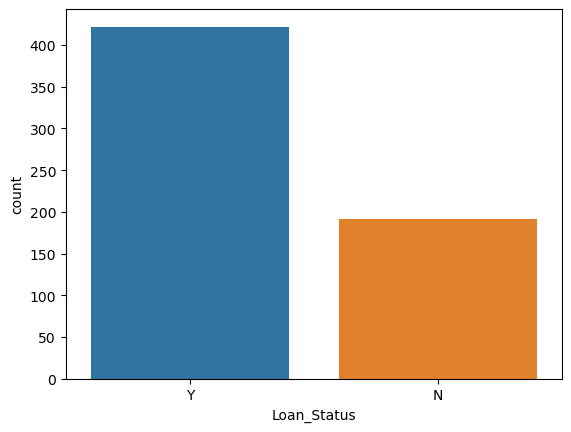

In [6]:
#Visualize the no. of churned customer
ax = sns.countplot(x='Loan_Status', data=df)
print(df['Loan_Status'].value_counts())

This shows that more no. of people are eligible to avail the loan request.

Male      489
Female    112
Name: Gender, dtype: int64


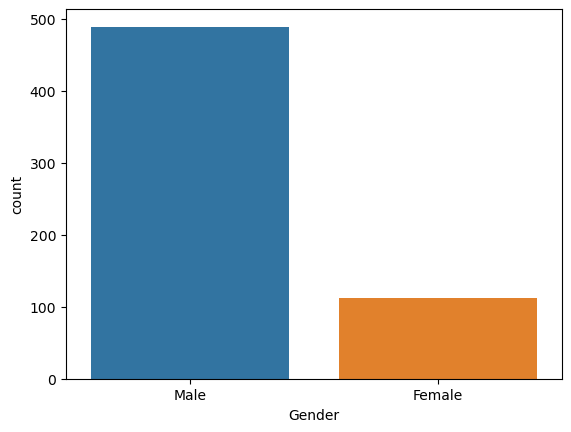

In [7]:
#Visulaizing the count of gender
print(df['Gender'].value_counts())
ax = sns.countplot(x='Gender', data=df)
plt.show()

The no. of male members are more as compared to females.

Yes    398
No     213
Name: Married, dtype: int64


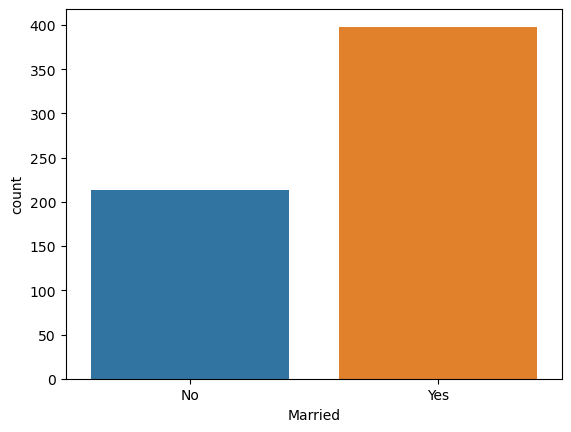

In [8]:
#Visulaizing the Married
print(df['Married'].value_counts())
ax = sns.countplot(x='Married', data=df)
plt.show()

Most of the married people are eligible to avail loan request.

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


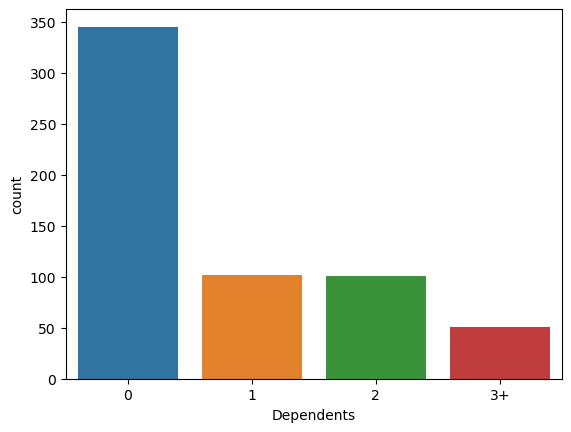

In [9]:
#Visulaizing the Dependents
print(df['Dependents'].value_counts())
ax = sns.countplot(x='Dependents', data=df)
plt.show()

The people who have no dependency have high eligibility to avail loan.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


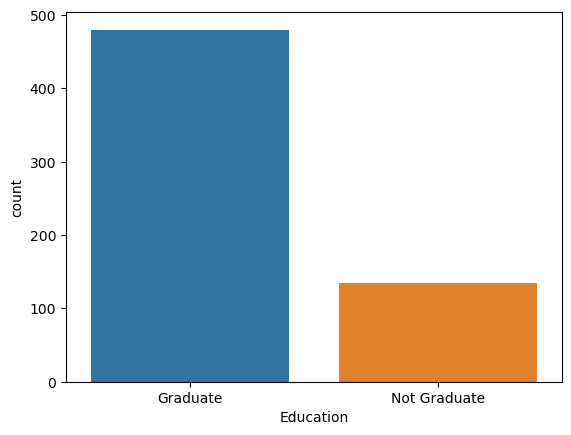

In [11]:
#Visulaizing the Education
print(df['Education'].value_counts())
ax = sns.countplot(x='Education', data=df)
plt.show()

Most of the people are graduate.

No     500
Yes     82
Name: Self_Employed, dtype: int64


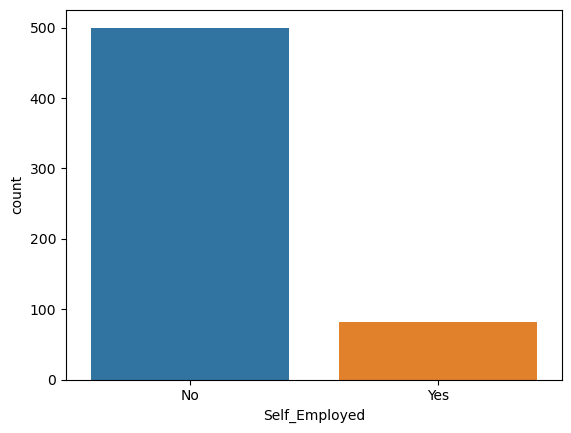

In [12]:
#Visulaizing the Self_Employed
print(df['Self_Employed'].value_counts())
ax = sns.countplot(x='Self_Employed', data=df)
plt.show()

Very least people are self employed while most people are not.

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


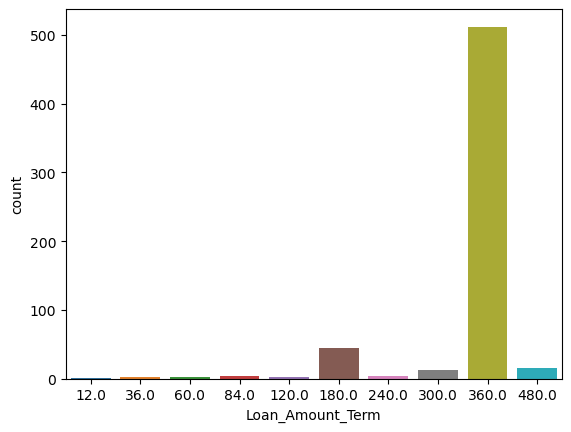

In [13]:
#Visulaizing the Loan_Amount_Term
print(df['Loan_Amount_Term'].value_counts())
ax = sns.countplot(x='Loan_Amount_Term', data=df)
plt.show()

Most of the term is 360 followed by 180.

1.0    475
0.0     89
Name: Credit_History, dtype: int64


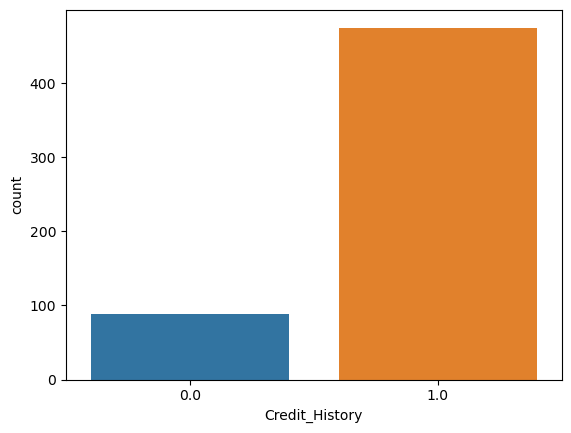

In [14]:
#Visulaizing the Credit_History
print(df['Credit_History'].value_counts())
ax = sns.countplot(x='Credit_History', data=df)
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


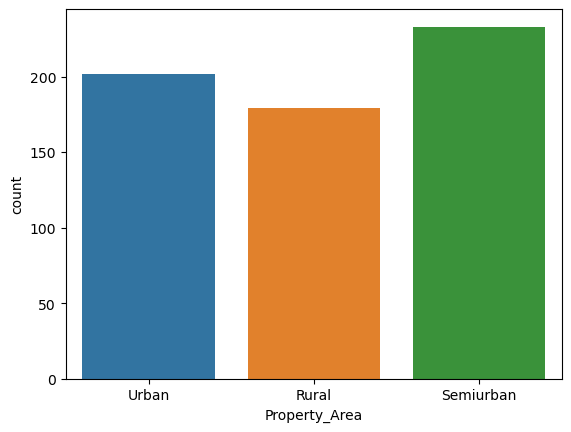

In [15]:
#Visulaizing the Property_Area
print(df['Property_Area'].value_counts())
ax = sns.countplot(x='Property_Area', data=df)
plt.show()

Most of the Property area is semi urban followed by urban.

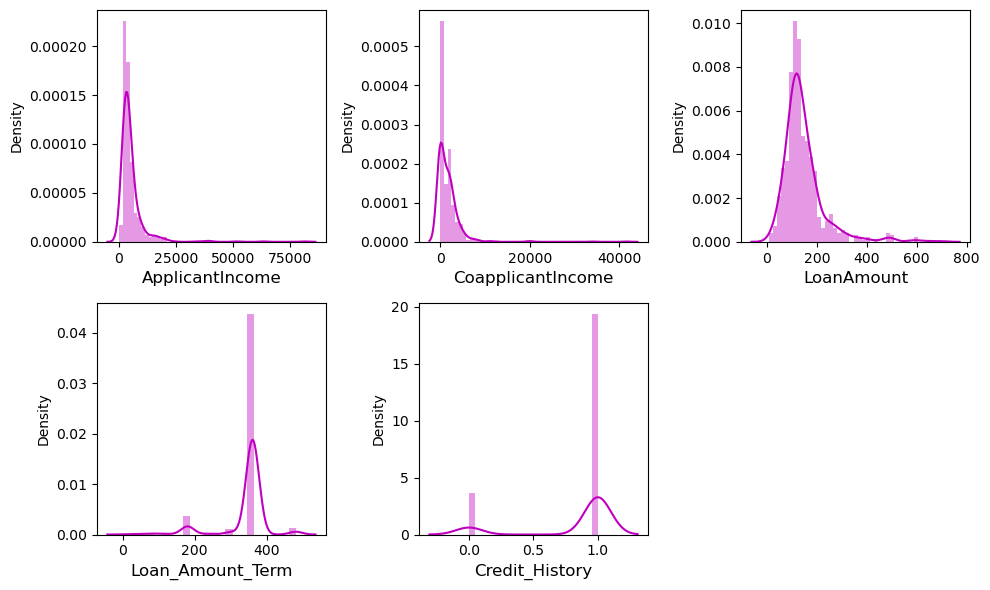

In [6]:
#Visualizing data using dist plot
plt.figure(figsize= (10,6), facecolor='white')
plotnumber=1
for col in num_col:
    if plotnumber<=5:
        ax = plt.subplot(2,3, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
    plt.tight_layout()

From the above distribution plot we notice that ApplicantIncome, CoapplicantIncome and LoanAmount are right skewed and the rest are fine.

### Bivariate Analysis

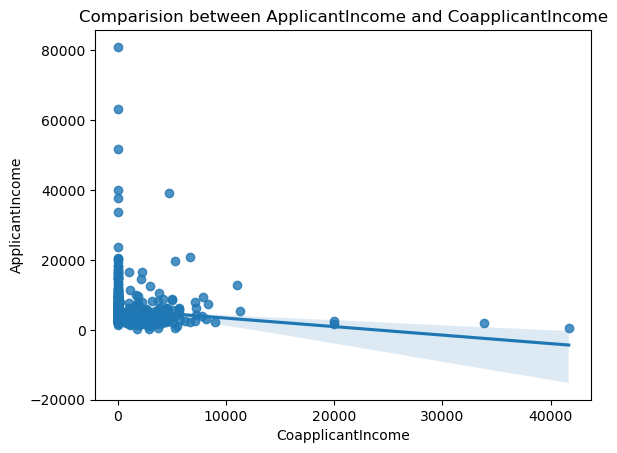

In [12]:
#Comparing ApplicantIncome and CoaaplicantIncome
plt.title("Comparision between ApplicantIncome and CoapplicantIncome")
sns.regplot(x = "CoapplicantIncome", y = "ApplicantIncome", data=df)
plt.show()

There is a negative relation between them.

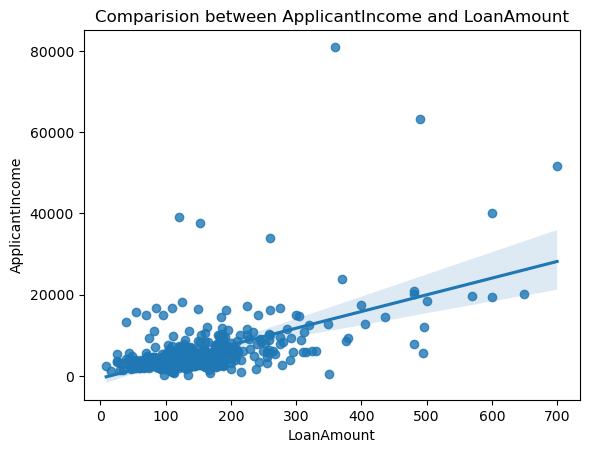

In [13]:
#Comparing ApplicantIncome and LoanAmount
plt.title("Comparision between ApplicantIncome and LoanAmount")
sns.regplot(x = "LoanAmount", y = "ApplicantIncome", data=df)
plt.show()

There is a positve relation between ApplicantIncome and LoanAmount as when the ApplicantIncome increases the LoanAmount increases.

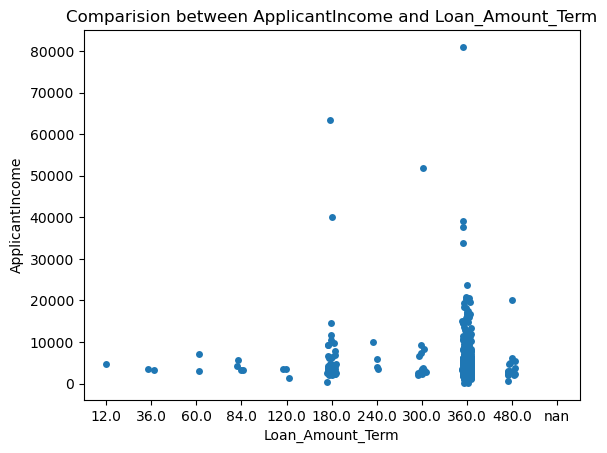

In [16]:
#Comparing ApplicantIncome and CoaaplicantIncome
plt.title("Comparision between ApplicantIncome and Loan_Amount_Term")
sns.stripplot(x = "Loan_Amount_Term", y = "ApplicantIncome", data=df)
plt.show()

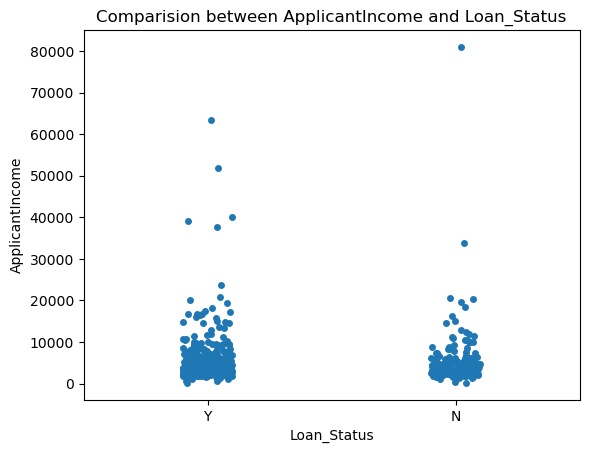

In [18]:
#Comparing ApplicantIncome and Loan_Status
plt.title("Comparision between ApplicantIncome and Loan_Status")
sns.stripplot(x = "Loan_Status", y = "ApplicantIncome", data=df)
plt.show()

No significant difference between them.

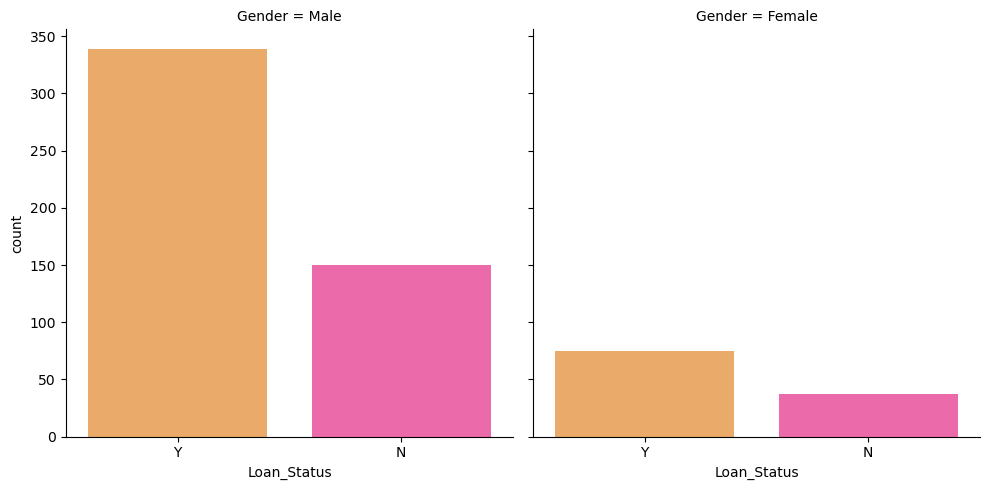

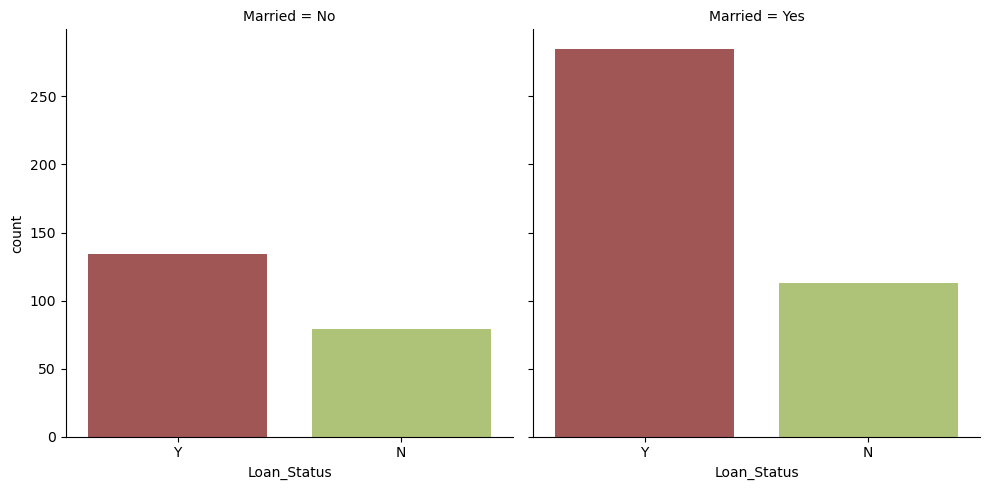

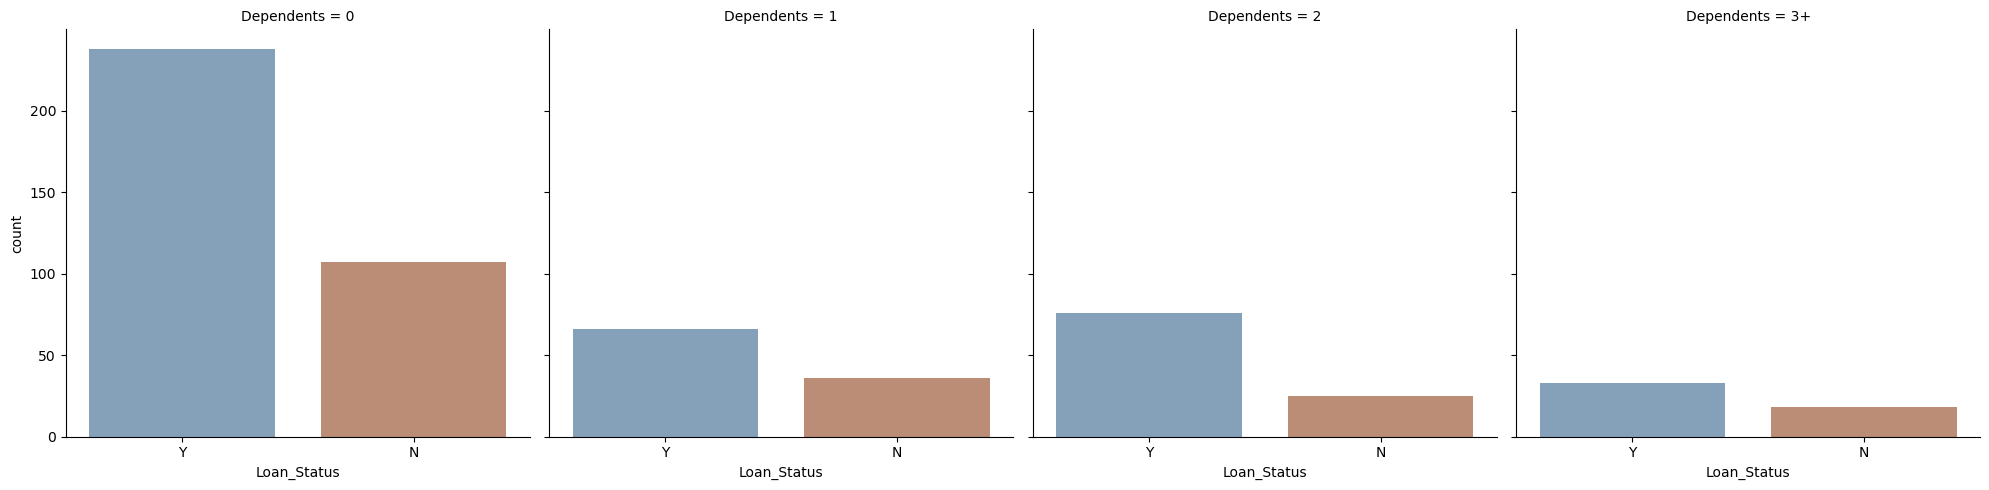

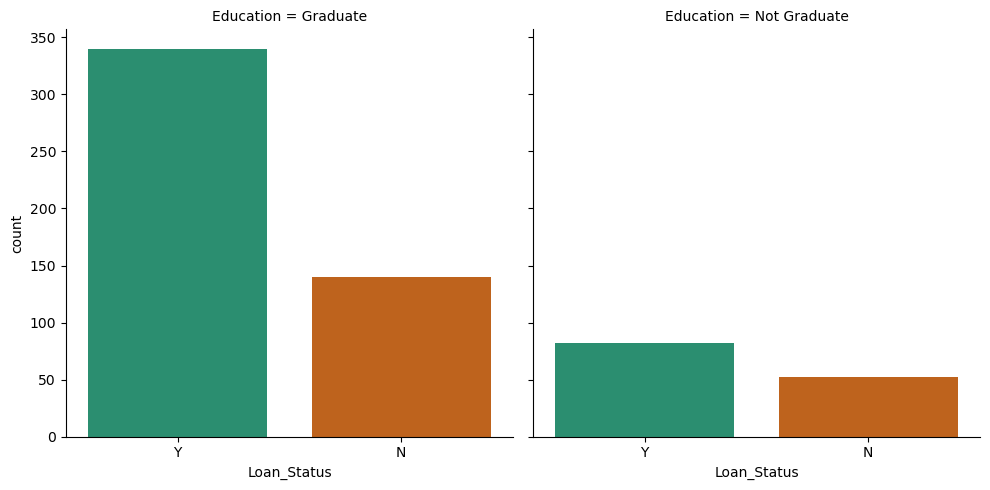

In [5]:
#Checking Loan_Status and gender
sns.catplot(x = 'Loan_Status', col = 'Gender', data = df, kind = 'count', palette = 'spring_r')

#Checking Loan_Status and Married
sns.catplot(x= 'Loan_Status', col='Married', data = df, palette='tab20b_r', kind ='count')

#Checking Loan_Status in Dependents
sns.catplot(x= 'Loan_Status', col='Dependents', data=df, kind='count', palette='twilight_shifted')

#Checking Loan_Status in Education
sns.catplot(x='Loan_Status', col='Education', data=df, kind='count', palette='Dark2')
plt.show()

1. In the first plot we see the number of males is way more than the number of females w.r.t Loan_Status.
2. In the second plot we see married people have more loan status then unmarried people.
3. In the third plot we see the people having 0 dependents have more loan status than the people having more dependents.
4. In the fourth plot we see those who are graduate have more loan status than those we are not graduate.

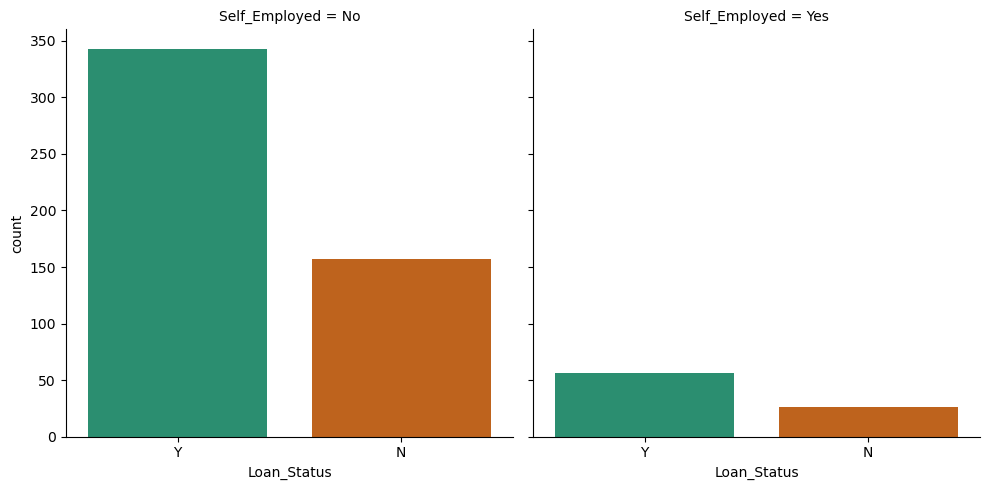

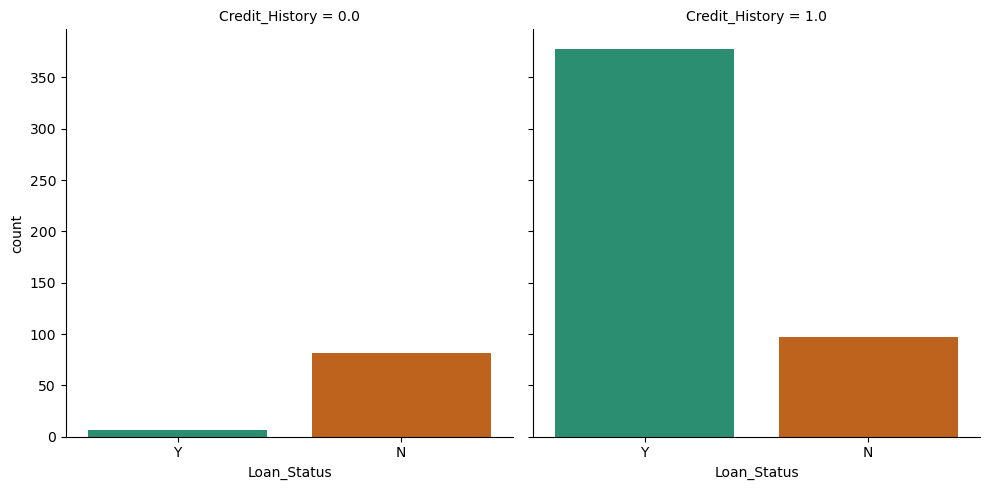

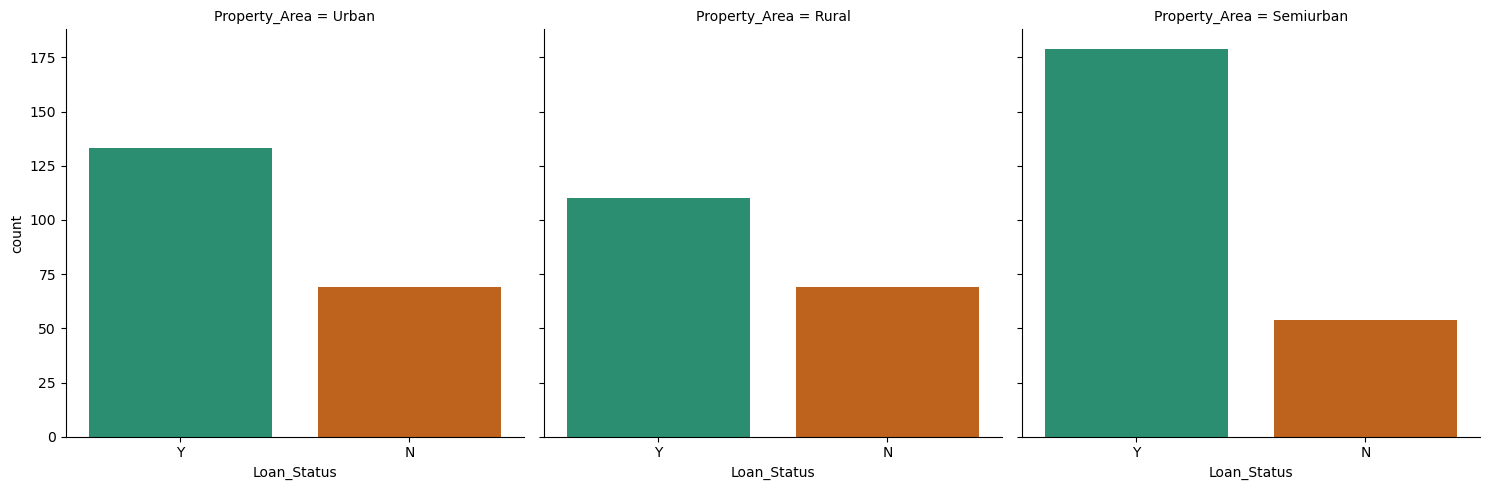

In [6]:
#Checking Loan_Status in Self_Employed
sns.catplot(x='Loan_Status', col='Self_Employed', data=df, kind='count', palette='Dark2')

#Checking Loan_Status in Credit_History
sns.catplot(x='Loan_Status', col='Credit_History', data=df, kind='count', palette='Dark2')

#Checking Loan_Status in Property_Area
sns.catplot(x='Loan_Status', col='Property_Area', data=df, kind='count', palette='Dark2')

plt.show()

1. In the first plot we see that those who are not self employed have more loan status than self employed people.
2. In the second plot we see that those who have more credit history have more loan status.
3. In the third plot we see that those who are from semi urban are have more loan status then comes urban people followed by rural people.

### Multivariate Analysis

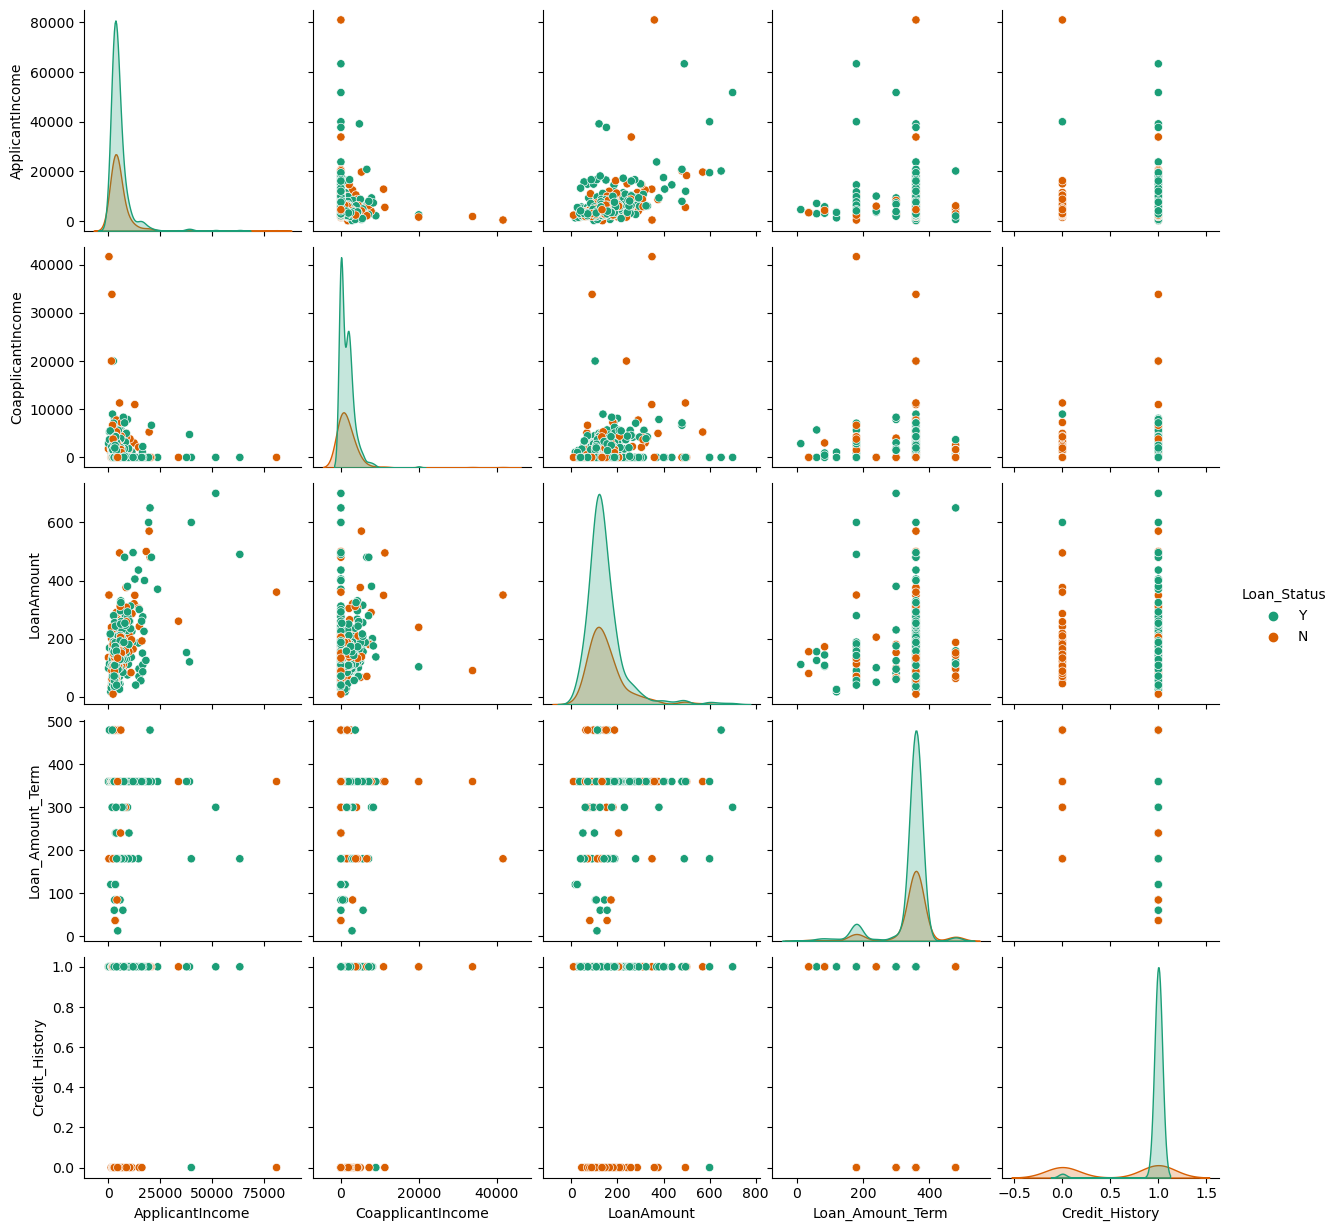

In [8]:
sns.pairplot(df, hue="Loan_Status", palette = "Dark2")
plt.show()

1. The above pair plot gives the pairwise relationship between features on the basis of "Loan_Status".
2. On the diagonal we notice the distribution plot.
3. We can see some outliers here, let's plot boxolot to check for outliers.

### Checking for outliers

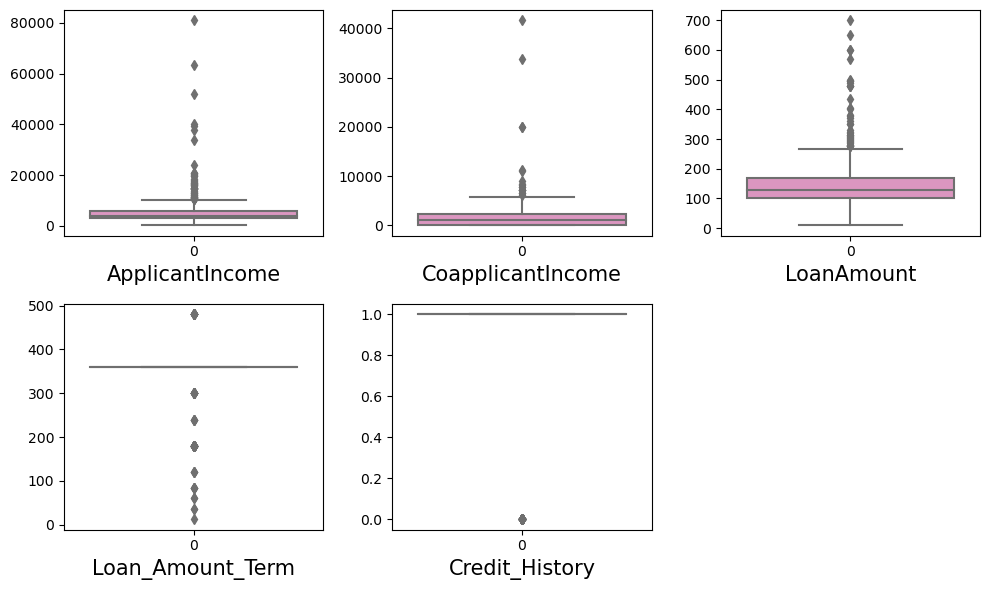

In [6]:
#Checking for outliers by box plot
plt.figure(figsize= (10, 6), facecolor="white")
plotnumber=1
for col in num_col:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()    

We can see a lot of outliers here. We have to deal with it.

Before dealing with outliers let's convert categorical columns to numerical using Ordinal Encoder.

### Ordinal Encoder

In [13]:
#Let's convert categorical values to numerical using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df        

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


We have successfully encoded all the categorical columns to numerical. Let's move ahead.

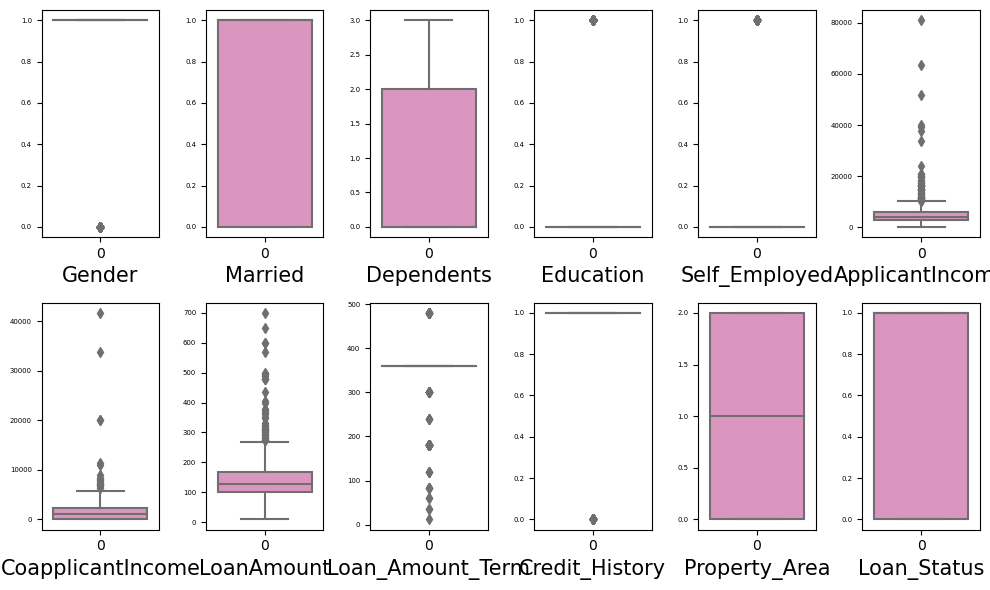

In [21]:
#Again checking for outliers by box plot
plt.figure(figsize= (10, 6), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=5)
    plotnumber+=1
plt.tight_layout()    

Here, we can see the columns Gender, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History have outliers. We have to deal with them.

Before that let's check for null values.

In [14]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see there are alot of null values present in the data. Let's fill it first.

In [15]:
#Filling null values using fillna() method
df['Gender'] = df['Gender'].fillna(df['Gender'].median())

df['Married'] = df['Married'].fillna(df['Married'].median())

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].median())

df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].median())

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [16]:
#Let's check
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have filled all the nulls. Let's check for outliers again.

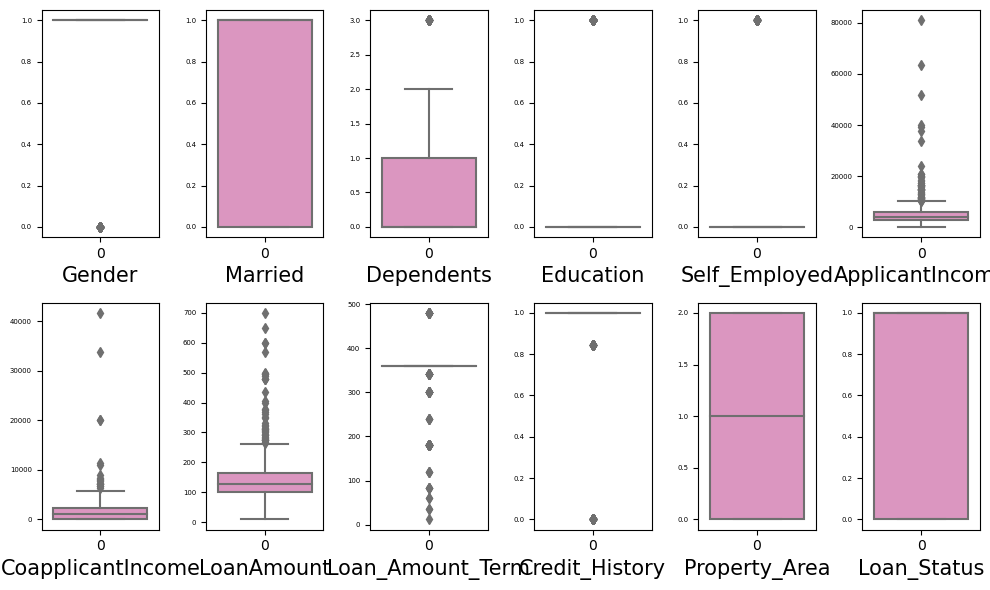

In [25]:
#Again checking for outliers by box plot
plt.figure(figsize= (10, 6), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=5)
    plotnumber+=1
plt.tight_layout()    

Let's deal with the outliers.

### Z Score

In [17]:
from scipy.stats import zscore
import numpy as np

out_features = df[['Gender', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
z = np.abs(zscore(df))
z.shape

(614, 12)

In [18]:
threshold = 3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [19]:
z.iloc[9,6]

3.196712546212882

In [20]:
#Removing the data above Zscore and creating new df
df1= df[(z<3).all(axis=1)]
df1.shape

(577, 12)

In [21]:
#Shape of old and new dataframe
print('Shape of Old dataframe :', df.shape)
print('Shape of New dataframe :', df1.shape)

Shape of Old dataframe : (614, 12)
Shape of New dataframe : (577, 12)


In [22]:
print("Data Loss Percentage :", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage : 6.026058631921824


There is 6% data loss which is acceptable.

In [23]:
df=df1

### IQR Method 

In [24]:
# #Let's find more outliers by IQR Method
# #1st quantile
# Q1 = out_features.quantile(0.25)

# #3rd quantile
# Q3 = out_features.quantile(0.75)

# #IQR
# IQR = Q3 - Q1

# df2 = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Calculate Q1, Q3, and IQR for the out_features subset
Q1 = out_features.quantile(0.25)
Q3 = out_features.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers from out_features using IQR
outlier_filter = ~((out_features < (Q1 - 1.5 * IQR)) | (out_features > (Q3 + 1.5 * IQR))).any(axis=1)

# Use the filter to get the corresponding rows from the original df
df2 = df[outlier_filter]


In [25]:
df2.shape

(199, 12)

In [26]:
print("Data Loss Percentage after removing outliers with IQR method :", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method : 65.51126516464471


There is a huge data loss here which is not acceptable. Let's proceed further.

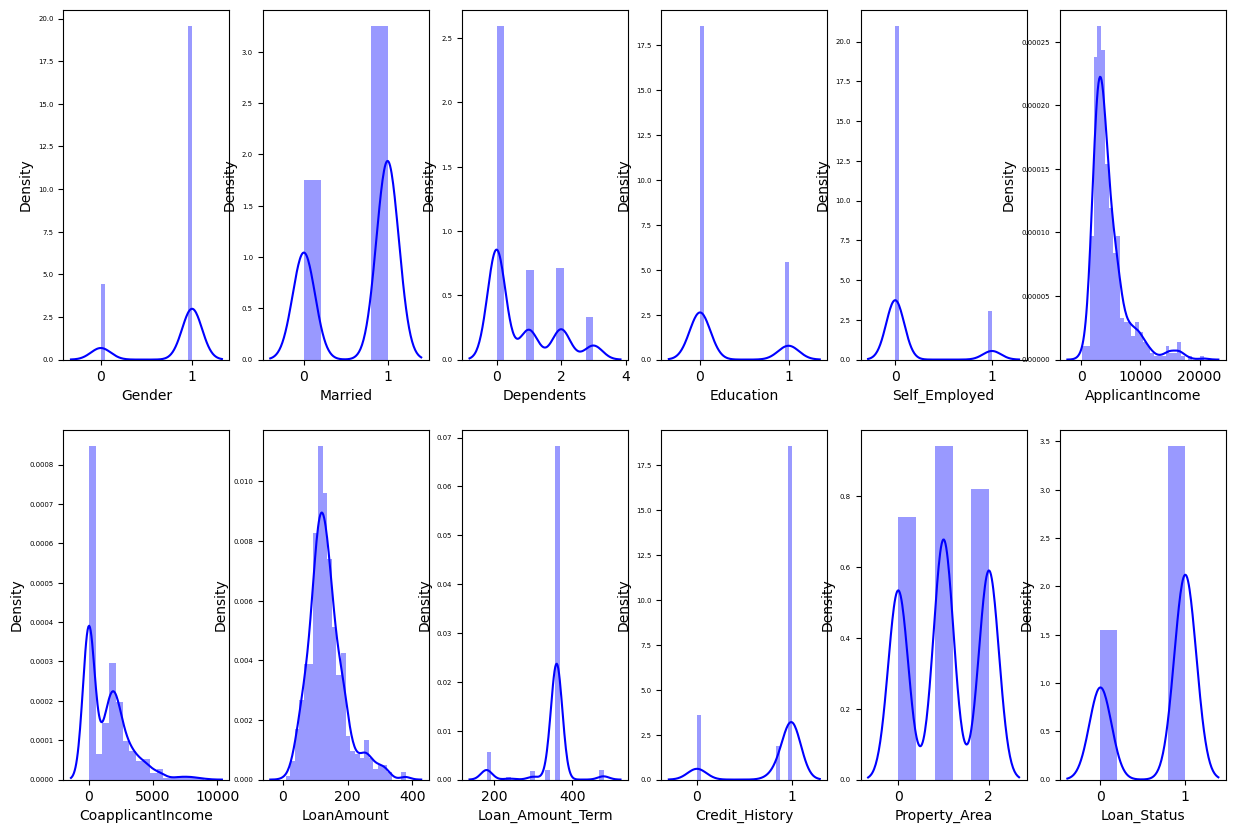

In [28]:
#Checking how data is distributed in each column
plt.figure(figsize=(15, 10), facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=10)
        plt.yticks(rotation=0, fontsize=5)
    plotnumber+=1
plt.show()    

The data looks more normal than before. Let's proceed ahead.

In [27]:
#Checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    float64
 1   Married            577 non-null    float64
 2   Dependents         577 non-null    float64
 3   Education          577 non-null    float64
 4   Self_Employed      577 non-null    float64
 5   ApplicantIncome    577 non-null    int64  
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    float64
 11  Loan_Status        577 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 58.6 KB


In [28]:
#Checking description
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.814558,0.649913,0.719237,0.227036,0.126516,4666.020797,1420.807487,136.048644,347.604853,0.838646,1.031196,0.689775
std,0.388993,0.477411,0.995229,0.419280,0.332719,2965.452652,1651.545352,56.193532,51.819095,0.353795,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,1255.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5532.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


Everything looks good. Let's move ahead.

### Checking for Correlation between features and label

In [24]:
#Let's see the correlation between features and label
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.026943,0.190543,0.159957,-0.104412,0.016566,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.008567,0.237322,0.165147,-0.127289,0.013364,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.077227,-0.026220,0.135610,-0.083756,-0.017044,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.166400,-0.037780,-0.146598,-0.094628,-0.080920,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.250665,-0.039572,0.121892,-0.033346,-0.014899,-0.028253,-0.026525
ApplicantIncome,0.026943,-0.008567,0.077227,-0.166400,0.250665,1.000000,-0.220975,0.442394,-0.050606,0.044016,-0.003641,-0.005003
CoapplicantIncome,0.190543,0.237322,-0.026220,-0.037780,-0.039572,-0.220975,1.000000,0.309479,-0.060345,-0.019224,-0.093505,0.045009
LoanAmount,0.159957,0.165147,0.135610,-0.146598,0.121892,0.442394,0.309479,1.000000,0.040302,0.006094,-0.075749,-0.035289
Loan_Amount_Term,-0.104412,-0.127289,-0.083756,-0.094628,-0.033346,-0.050606,-0.060345,0.040302,1.000000,0.030430,-0.058990,-0.018144
Credit_History,0.016566,0.013364,-0.017044,-0.080920,-0.014899,0.044016,-0.019224,0.006094,0.030430,1.000000,-0.009747,0.561857


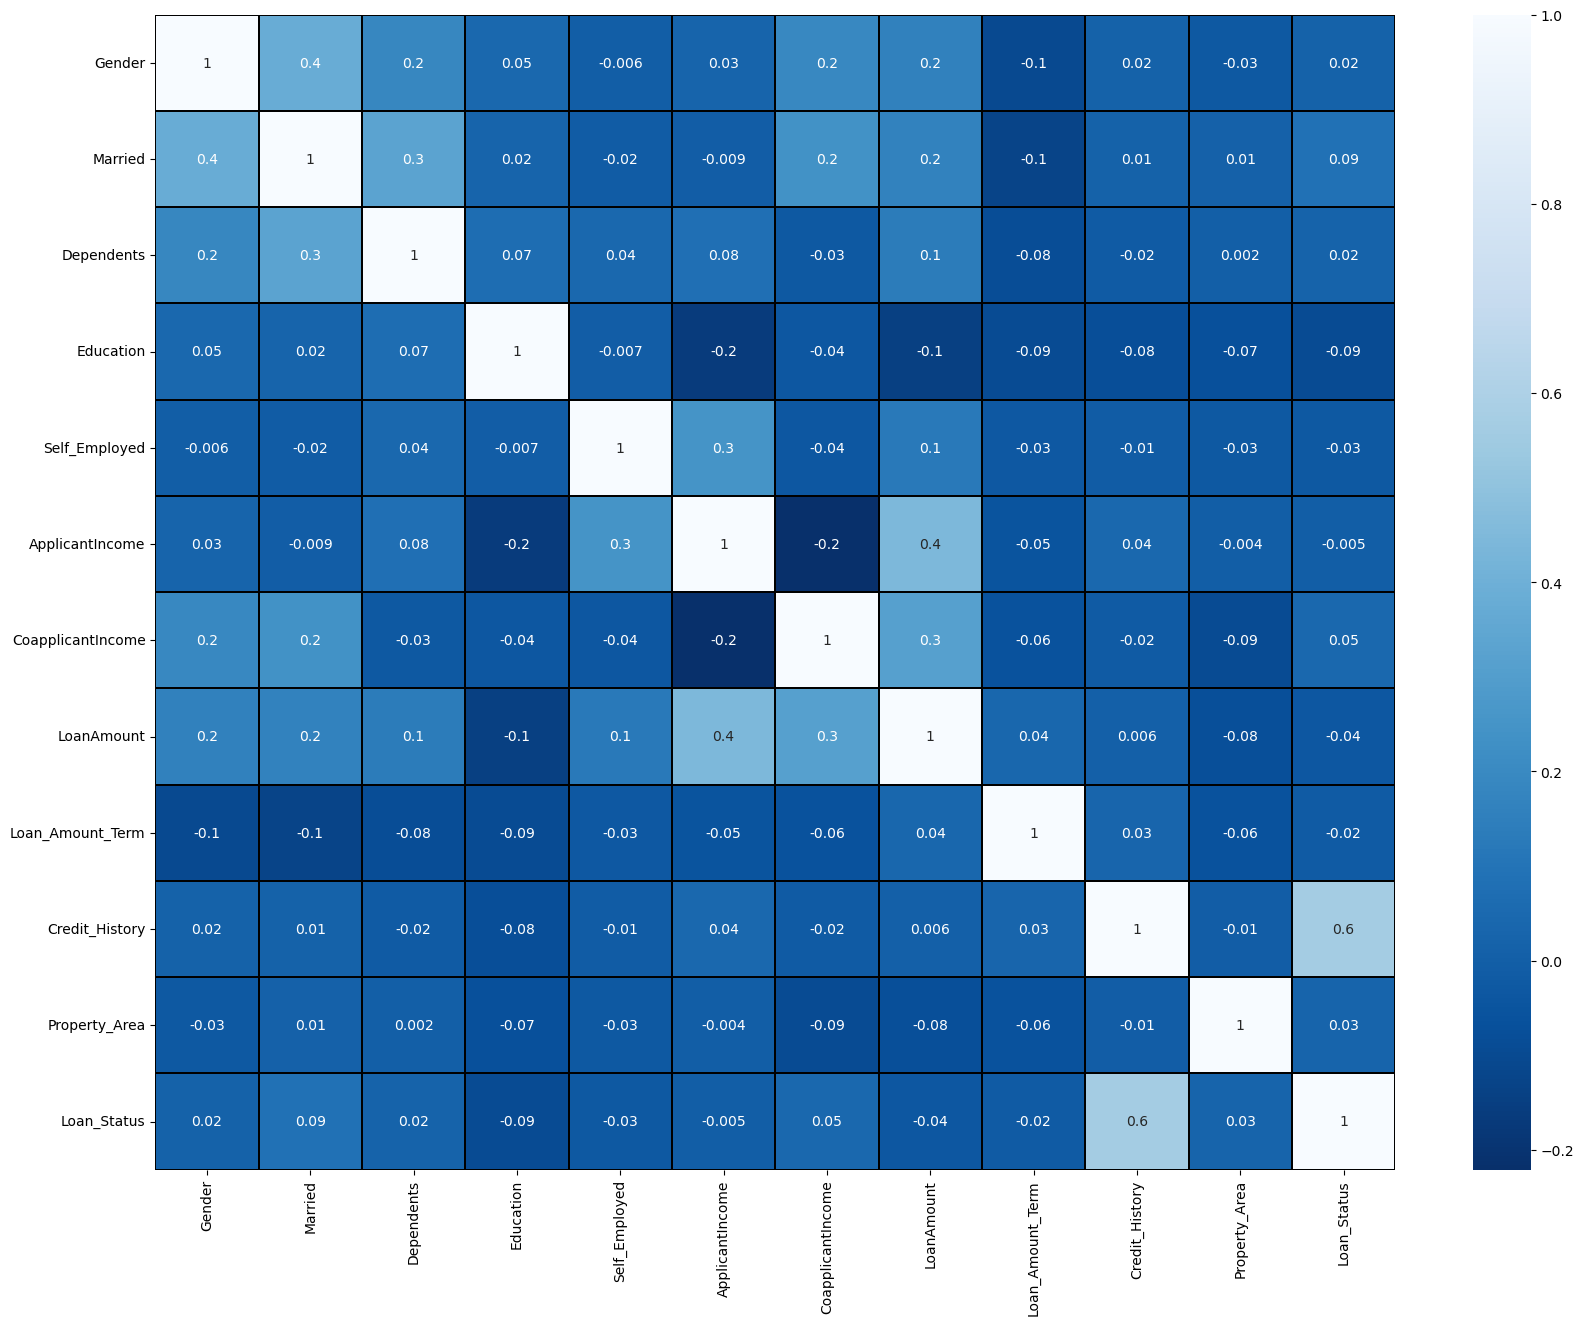

In [25]:
#Visualizing correlation by plotting a heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation=0)
plt.show()

- The above heatmap shows the correlation between features and label.
- We can noitce that there are no much positive correlations between features and label.
- The label is negatively correlated with Education, Self_Employed, ApplicantIncome, LoanAmount and Loan_Amount_Term.
- The label is positively correlated with Gender, Married, Dependents, CoapplicantIncome, Credit_History and Property_Area.

In [26]:
cor['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.561857
Married              0.089026
CoapplicantIncome    0.045009
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.005003
Loan_Amount_Term    -0.018144
Self_Employed       -0.026525
LoanAmount          -0.035289
Education           -0.092658
Name: Loan_Status, dtype: float64

Here, we can notice there is a positive correlation between Loan_Status and Credit_History of 56%.

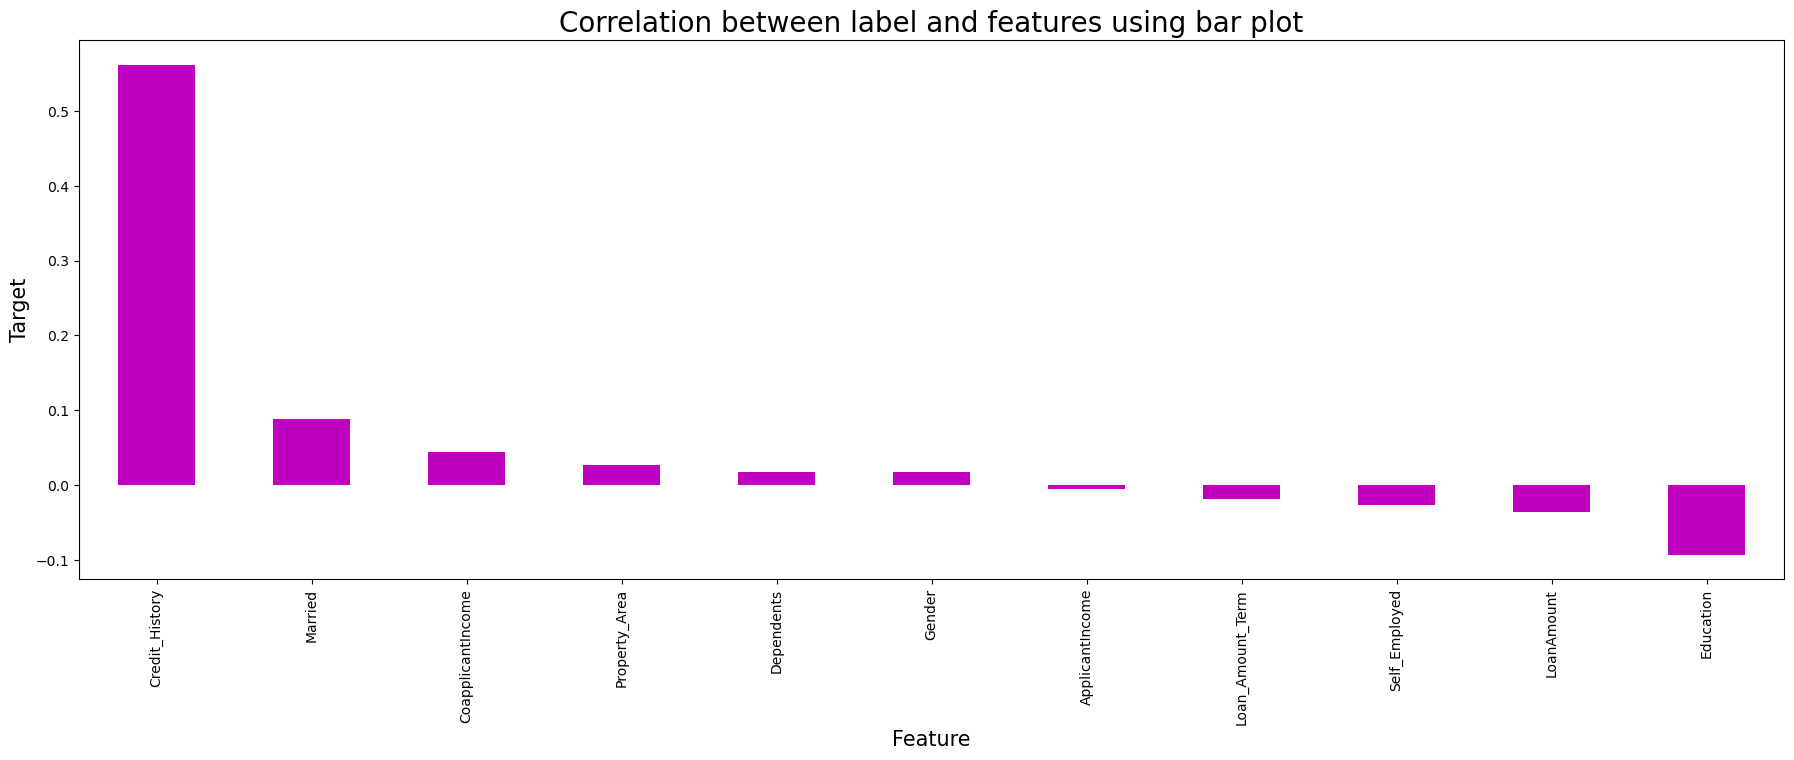

In [31]:
#Visualizing the correlation using bar plot
plt.figure(figsize = (22,7))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Correlation between label and features using bar plot", fontsize=20)
plt.show()

We can see that Credit_History has the highest positive correlation with the label i.e. Loan_Status, so let's just drop it.

In [29]:
df.drop('Credit_History', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,2.0,1.0


We have successfully dropped the Credit_History column. Let's move ahead.

### Checking for Skewness

In [30]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We can see the presence of skewness in Dependents, Education, Self_Employed, Applicant_Income, CoapplicantIncome and Loan_Amount. We have to reduce it.

In [31]:
#Removing skewness using transformation methods
df['Dependents'] = np.cbrt(df['Dependents'])

df['Education'] = np.cbrt(df['Education'])

df['Self_Employed'] = np.cbrt(df['Self_Employed'])

df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

df['CoapplicantIncome'] = np.cbrt(df['CoapplicantIncome'])

df['LoanAmount'] = np.cbrt(df['LoanAmount'])

In [32]:
#Let's check
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.499408
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.077031
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [35]:
df['Self_Employed'] = np.sqrt(df['Self_Employed'])
df['Education'] = np.sqrt(df['Education'])

In [37]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.499408
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.077031
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

I tried reducing the skewness in Self_Employed and Education columns but it isn't working. I tried log transformation method but it became NaN. So I'm leaving it as it is.

Let's go ahead and separate features and label.

### Separating Features and Label

In [38]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

### Feature scaling using Standard Scaler

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,0.477137,-1.362511,-0.806565,-0.541961,-0.380580,0.688804,-1.093504,0.318405,0.239408,1.227472
1,0.477137,0.733939,0.878698,-0.541961,-0.380580,0.249126,0.596681,-0.012836,0.239408,-1.306522
2,0.477137,0.733939,-0.806565,-0.541961,2.627567,-0.514699,-1.093504,-1.445145,0.239408,1.227472
3,0.477137,0.733939,-0.806565,1.845150,-0.380580,-0.784474,0.868268,-0.166705,0.239408,1.227472
4,0.477137,-1.362511,-0.806565,-0.541961,-0.380580,0.734749,-1.093504,0.224069,0.239408,1.227472
...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.806565,-0.541961,-0.380580,-0.575810,-1.093504,-1.302297,0.239408,-1.306522
573,0.477137,0.733939,1.624005,-0.541961,-0.380580,0.051015,-1.093504,-2.336409,-3.237229,-1.306522
574,0.477137,0.733939,0.878698,-0.541961,-0.380580,1.269468,-0.177556,1.830577,0.239408,1.227472
575,0.477137,0.733939,1.316734,-0.541961,-0.380580,1.156821,-1.093504,0.960923,0.239408,1.227472


We have scaled the data to reduce the biasness.

### Checking for VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values, i)
                    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF Values,Features
0,1.220470,Gender
1,1.417528,Married
2,1.187263,Dependents
3,1.064732,Education
4,1.052218,Self_Employed
5,1.750897,ApplicantIncome
6,1.580761,CoapplicantIncome
7,1.582677,LoanAmount
8,1.059752,Loan_Amount_Term
9,1.028023,Property_Area


Every VIF value is <10 which is perfect. 

In [41]:
#Checking the value count of the target column
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

We can see that the data is not balanced. Since it is a classification problem we have to balance the data using OverSampling method.

### OverSampling

In [42]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()

x,y = SM.fit_resample(x,y)   

In [43]:
#Let's check again
y.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

We have successfully balanced the data. Let's proceed further.

### Data Modelling

In [44]:
#Finding best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best accuracy score is", maxAccu, "at random_state", maxRS)        

Best accuracy score is 0.803347280334728 at random_state 110


### Creating Train Test Split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=maxRS)

### Classification Algorithms

In [46]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [47]:
#Checking accuracy for Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.7489539748953975
[[84 34]
 [26 95]]
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74       118
         1.0       0.74      0.79      0.76       121

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239



In [48]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.6108786610878661
[[73 45]
 [48 73]]
              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61       118
         1.0       0.62      0.60      0.61       121

    accuracy                           0.61       239
   macro avg       0.61      0.61      0.61       239
weighted avg       0.61      0.61      0.61       239



In [49]:
#SVC
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.5899581589958159
[[77 41]
 [57 64]]
              precision    recall  f1-score   support

         0.0       0.57      0.65      0.61       118
         1.0       0.61      0.53      0.57       121

    accuracy                           0.59       239
   macro avg       0.59      0.59      0.59       239
weighted avg       0.59      0.59      0.59       239



In [50]:
#Gradient Boosting
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test, predGBC))
print(confusion_matrix(y_test, predGBC))
print(classification_report(y_test, predGBC))

0.7112970711297071
[[84 34]
 [35 86]]
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       118
         1.0       0.72      0.71      0.71       121

    accuracy                           0.71       239
   macro avg       0.71      0.71      0.71       239
weighted avg       0.71      0.71      0.71       239



In [51]:
#Ada Boost
AB = AdaBoostClassifier()
AB.fit(x_train, y_train)
predAB = AB.predict(x_test)
print(accuracy_score(y_test, predAB))
print(confusion_matrix(y_test, predAB))
print(classification_report(y_test, predAB))

0.6861924686192469
[[83 35]
 [40 81]]
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.69       118
         1.0       0.70      0.67      0.68       121

    accuracy                           0.69       239
   macro avg       0.69      0.69      0.69       239
weighted avg       0.69      0.69      0.69       239



In [52]:
#Bagging Classifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.7071129707112971
[[89 29]
 [41 80]]
              precision    recall  f1-score   support

         0.0       0.68      0.75      0.72       118
         1.0       0.73      0.66      0.70       121

    accuracy                           0.71       239
   macro avg       0.71      0.71      0.71       239
weighted avg       0.71      0.71      0.71       239



In [53]:
#Extra Trees
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test, predETC))
print(confusion_matrix(y_test, predETC))
print(classification_report(y_test, predETC))

0.803347280334728
[[98 20]
 [27 94]]
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       118
         1.0       0.82      0.78      0.80       121

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



Among all those calssification algorithms, Extra Trees Classifier gives the best accuracy of 80%.

### Cross Validation Score

In [54]:
#Checking cv score Random Forest Classifier
score = cross_val_score(RF,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predRF) - score.mean())

[0.75625    0.62893082 0.81761006 0.77358491 0.80503145]
0.7562814465408805
Difference between Accuracy score and cross validation score is -  -0.007327471645482975


In [55]:
#Checking cv score Logistic Regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predLR) - score.mean())

[0.53125    0.55345912 0.49056604 0.56603774 0.52830189]
0.5339229559748426
Difference between Accuracy score and cross validation score is -  0.07695570511302352


In [56]:
#Checking cv score Gradient Boosting Classifier
score = cross_val_score(GBC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predGBC) - score.mean())

[0.59375    0.56603774 0.68553459 0.76100629 0.75471698]
0.6722091194968554
Difference between Accuracy score and cross validation score is -  0.039087951632851725


In [57]:
#Checking cv score AdaBoost Classifier
score = cross_val_score(AB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predAB) - score.mean())

[0.53125    0.51572327 0.64779874 0.64779874 0.64150943]
0.596816037735849
Difference between Accuracy score and cross validation score is -  0.08937643088339786


In [58]:
#Checking cv score Bagging Classifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predBC) - score.mean())

[0.725      0.59119497 0.74213836 0.72955975 0.67924528]
0.6934276729559747
Difference between Accuracy score and cross validation score is -  0.013685297755322345


In [59]:
#Checking cv score ExtraTrees Classifier
score = cross_val_score(ETC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predETC) - score.mean())

[0.74375    0.6918239  0.77358491 0.80503145 0.81132075]
0.7651022012578615
Difference between Accuracy score and cross validation score is -  0.03824507907686647


Among all, the Extra Trees Classifier works better with least difference between accuracy and cross validation score.

### Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#Extra Trees Classifier
parameters = {'criterion' : ['gini', 'entropy'],
             'max_depth' : [0,10,20],
             'min_samples_split' : [-2, -1, 1, 2],
             'n_estimators' : [50, 100, 200, 300]}

In [62]:
grid = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [63]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'min_samples_split': [-2, -1, 1, 2],
                         'n_estimators': [50, 100, 200, 300]})

In [64]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 100}

In [65]:
final_model = ExtraTreesClassifier(criterion= 'entropy',
                                  max_depth=20,
                                  min_samples_split=2,
                                  n_estimators=100)
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

78.66108786610879


We got 78% accuracy on our model.

### Saving the model

In [66]:
import pickle

filename = 'Loan_Status.pkl'
pickle.dump(final_model, open(filename, 'wb'))
#Model saved

In [67]:
loaded_model = pickle.load(open ('Loan_Status.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

78.66108786610879


In [68]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
Original,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


Done!!!

### Documentation 

- First we imported necessary libraries.
- Imported data set and described the different columns present in it.
- Performed EDA (Exploratory Data Analysis).
- Under EDA we performed various functions such as we checked for data types, data info, columns, shape, presence of nulls, unique values in the data set, checked for numerical and categorical columns, data set description, dropped the Loan_ID as it was of no use and checked the value count of each column.
- Performed visualization such as univariate, bivariate and multivariate analysis by plotting different plots.
- Checked for outliers.
- Encoded the categorical data to numerical using Ordinal Encoder.
- Checked for null values and filled the nulls using fillna method.
- Applied Z Score method and IQR methods for removing outliers.
- Checked for data distribution in each column.
- Checked for correlation between features and label.
- Dropped the column with high positive correlation.
- Checked for skewness and reduced it.
- Separated label and features.
- Applied Standard Scaler to remove biasness between them.
- Checked for VIF.
- Checked for value counts in y and balanced the data using Over Sampling.
- Then comes Data Modelling.
- Then comes the Train Test Split.
- Imported different classification algorithms.
- Trained every model and got accuracy.
- Applied CV score to get the best model.
- Performed Hyper parameter Tuning to increase the score.
- Finally saved the model.